Based on https://elitedatascience.com/python-seaborn-tutorial

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv("pokemon.csv", index_col=0)

In [4]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


/Users/lauralorenz/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


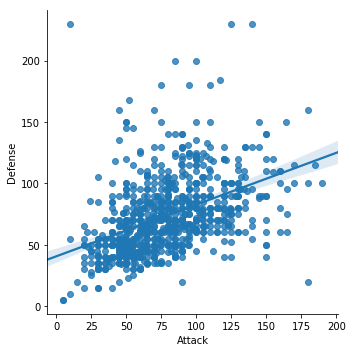

In [5]:
sns.lmplot(x='Attack', y='Defense', data=df)

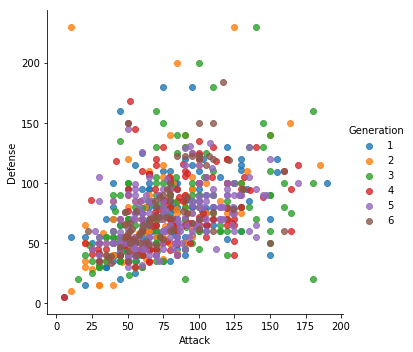

In [6]:
sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=False, hue='Generation')

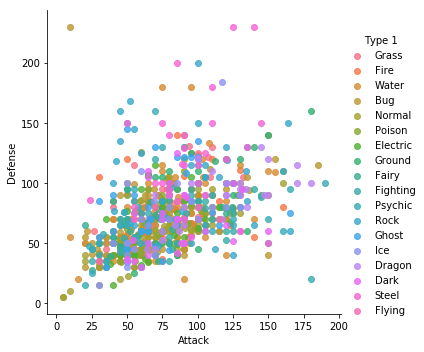

In [7]:
sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=False, hue='Type 1')

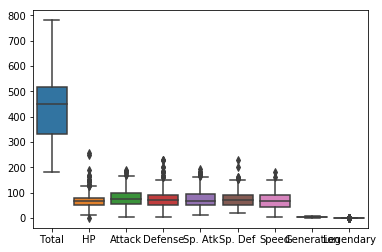

In [8]:
sns.boxplot(data=df)

In [9]:
# copy the dataframe and edit it to get rid of excess columns
stats_df = df.copy()
stats_df.drop(['Total','Generation','Legendary'], axis=1, inplace=True)

In [10]:
stats_df.columns

Index(['Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed'],
      dtype='object')

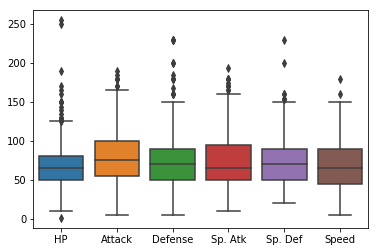

In [11]:
sns.boxplot(data=stats_df)

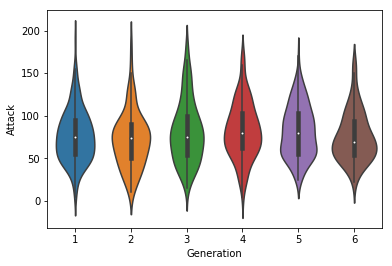

In [12]:
sns.violinplot(x='Generation', y='Attack', data=df)

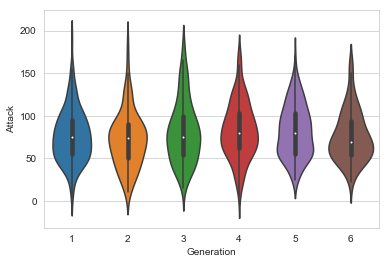

In [13]:
sns.set_style('whitegrid')
sns.violinplot(x='Generation', y='Attack', data=df)

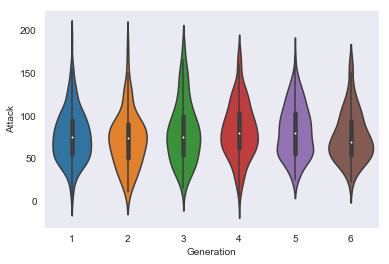

In [14]:
sns.set_style('dark')
sns.violinplot(x='Generation', y='Attack', data=df)

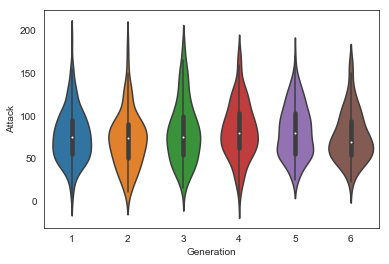

In [15]:
sns.set_style('white')
sns.violinplot(x='Generation', y='Attack', data=df)

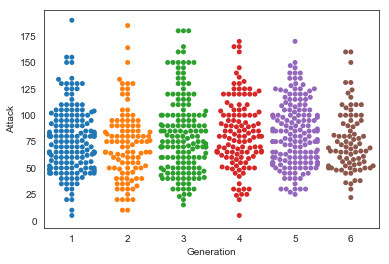

In [16]:
sns.swarmplot(x='Generation', y='Attack', data=df)

In [17]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80
4,Charmander,Fire,NaN,39,52,43,60,50,65


In [18]:
melted_df = stats_df.copy()
melted_df = pd.melt(melted_df, id_vars=['Name', 'Type 1', 'Type 2'], var_name='Stat')

In [19]:
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,VenusaurMega Venusaur,Grass,Poison,HP,80
4,Charmander,Fire,NaN,HP,39


In [20]:
melted_df.tail()

,Name,Type 1,Type 2,Stat,value
4795,Diancie,Rock,Fairy,Speed,50
4796,DiancieMega Diancie,Rock,Fairy,Speed,110
4797,HoopaHoopa Confined,Psychic,Ghost,Speed,70
4798,HoopaHoopa Unbound,Psychic,Dark,Speed,80
4799,Volcanion,Fire,Water,Speed,70


In [21]:
melted_df[melted_df['Name']=='Bulbasaur']

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
800,Bulbasaur,Grass,Poison,Attack,49
1600,Bulbasaur,Grass,Poison,Defense,49
2400,Bulbasaur,Grass,Poison,Sp. Atk,65
3200,Bulbasaur,Grass,Poison,Sp. Def,65
4000,Bulbasaur,Grass,Poison,Speed,45


In [23]:
from matplotlib import pyplot as plt

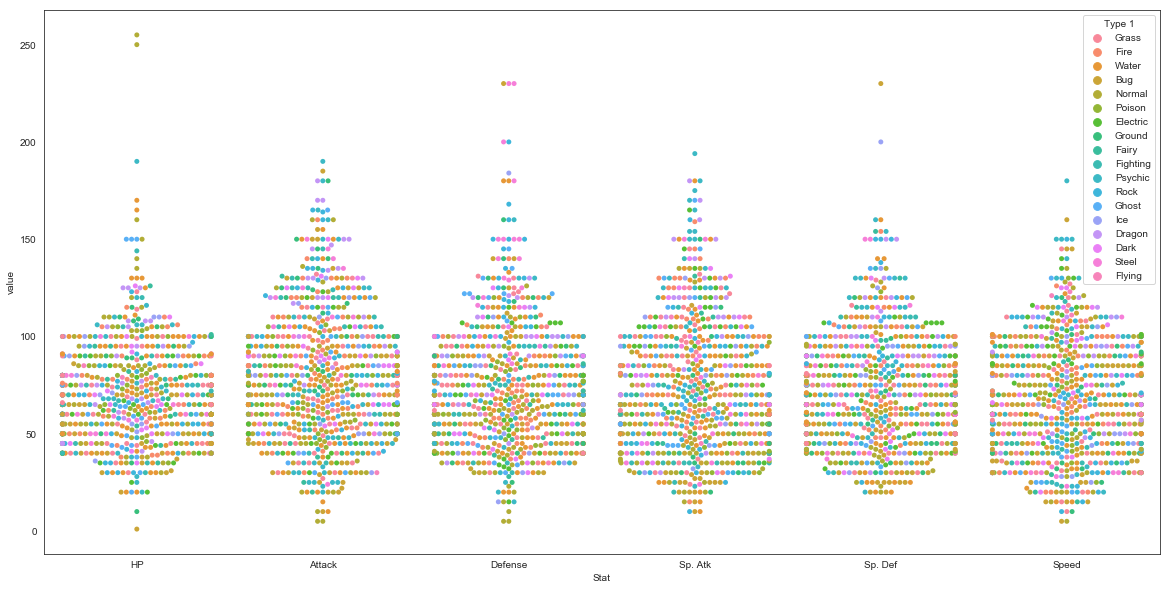

In [26]:
plt.figure(figsize=(20,10))
sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Type 1')

In [27]:
corr = stats_df.corr()

In [28]:
corr.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133


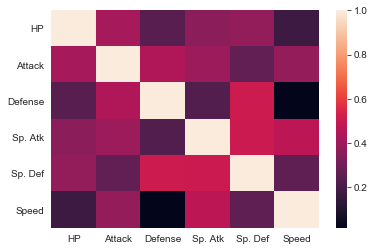

In [29]:
sns.heatmap(corr)

/Users/lauralorenz/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


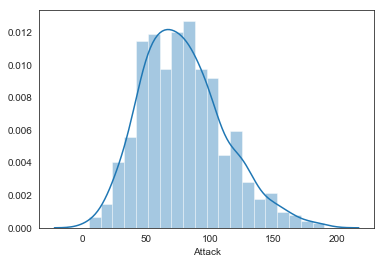

In [30]:
sns.distplot(df['Attack'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

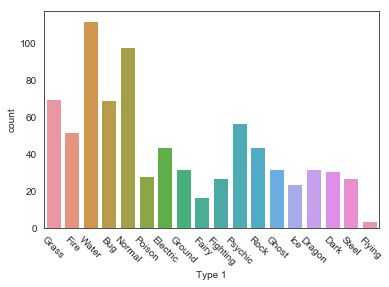

In [33]:
sns.countplot(x='Type 1', data=df)
plt.xticks(rotation=-45)

/Users/lauralorenz/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


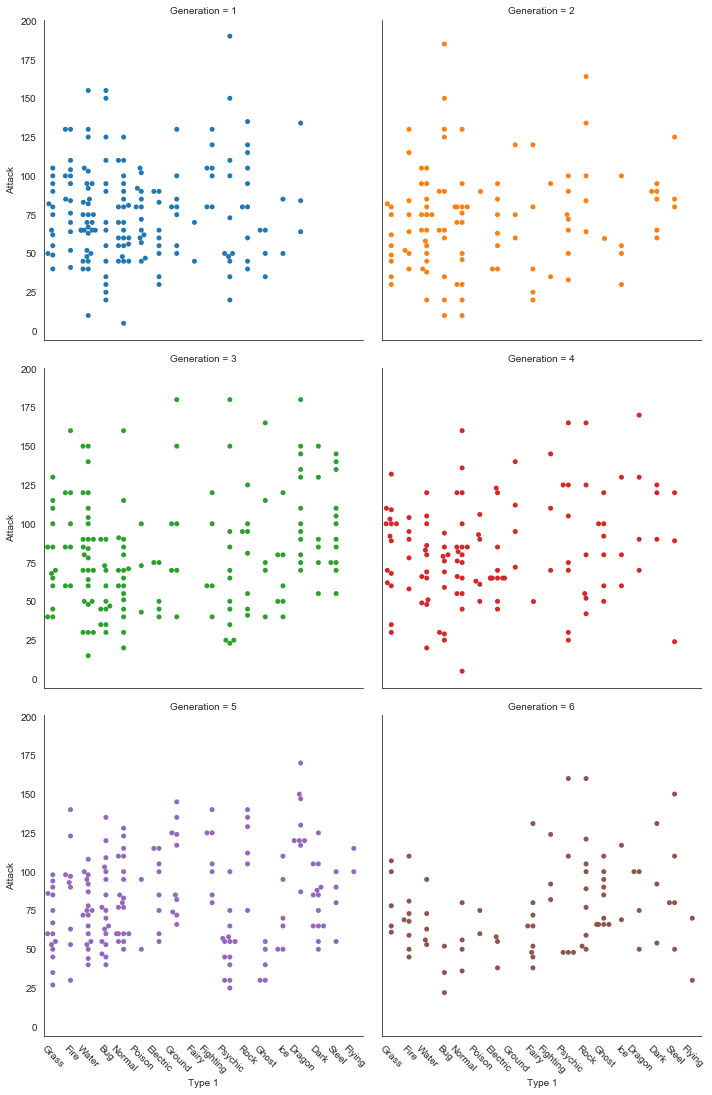

In [34]:
factor_plot = sns.factorplot(x='Type 1', y='Attack', data=df, hue='Generation', col='Generation', kind='swarm', col_wrap=2)
factor_plot.set_xticklabels(rotation=-45)

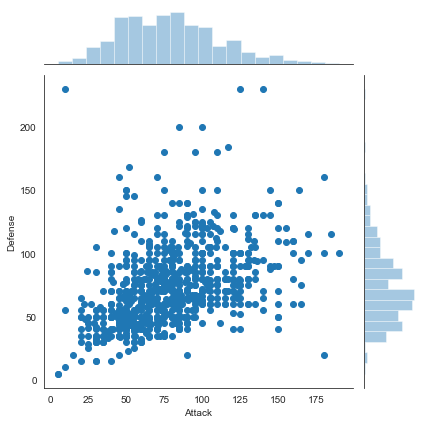

In [35]:
sns.jointplot(df['Attack'], df['Defense'])